In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import sklearn.preprocessing as pp
from scipy.stats import f_oneway, chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Training Data.csv')
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
160714,160715,6301452,71,4,single,rented,no,Police_officer,Bhubaneswar,Odisha,3,12,0
100364,100365,2327351,57,10,single,rented,yes,Design_Engineer,Agartala,Tripura,10,12,0
46235,46236,3928495,62,8,single,rented,no,Psychologist,Bhopal,Madhya_Pradesh,3,13,0
164208,164209,6570794,55,4,single,rented,no,Engineer,Madurai,Tamil_Nadu,4,13,0
80295,80296,3762111,61,13,single,rented,yes,Comedian,North_Dumdum,West_Bengal,6,13,0


## <font color = 'green'> A. Descriptive Analysis </font>

In [3]:
# Mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Sejauh ini, tipe data untuk setiap kolom sesuai dengan representasi data yang ada dalam dataset.

In [4]:
# Mengecek data null
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [5]:
df.duplicated().sum()

0

Tidak ada data null di setiap kolom.

In [8]:
numeric_cols['Risk_Flag'].value_counts(normalize=True)

Risk_Flag
0    0.877
1    0.123
Name: proportion, dtype: float64

In [6]:
numeric_cols = df.select_dtypes(include=['int64'])
categorical_cols = df.select_dtypes(include=['object'])

In [7]:
# Analisis Summary Kolom Numeric
numeric_cols.describe(include='all')

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


 Adanya ketimpangan yang signifikan antara kelas 0 dan kelas 1 pada kolom `Risk_Flag`.

In [9]:
# Analisis Summary Kolom Categoric
categorical_cols.describe(include='all')

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


Secara umum, tidak ada yang secara langsung aneh pada kolom kategorikal

## <font color = 'green'> Exploratory Data Analysis (EDA) </font>

### <font color = 'darkgreen'> 1. Univariate Analysis </font>

### Kolom Age

### <font color = 'darkgreen'> 2. Multivariate Analysis </font>

### Numeric Columns

In [9]:
numeric_cols.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


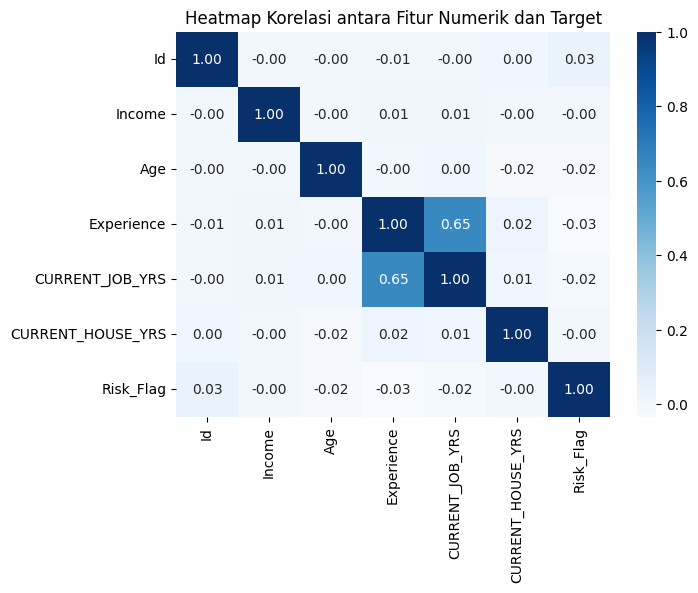

In [10]:
plt.figure(figsize=(7, 5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Heatmap Korelasi antara Fitur Numerik dan Target', fontsize=12)
plt.show()

Dari hasil ini, tidak ada fitur numerik yang memiliki korelasi yang signifikan dengan target `Risk_Flag`.

In [11]:
categorical_cols.columns

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')

In [24]:
label_encoder = pp.LabelEncoder()
df['Married_Single_Encode'] = label_encoder.fit_transform(df['Married/Single'])
df['Car_Ownership_Encode'] = label_encoder.fit_transform(df['Car_Ownership'])
df['House_Ownership_Encode'] = label_encoder.fit_transform(df['House_Ownership'])
df['Profession_Encode'] = label_encoder.fit_transform(df['Profession'])
df['CITY_Encode'] = label_encoder.fit_transform(df['CITY'])
df['STATE_Encode'] = label_encoder.fit_transform(df['STATE'])

df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married_Single_Encode,Car_Ownership_Encode,House_Ownership_Encode,Profession_Encode,CITY_Encode,STATE_Encode
111413,111414,7552384,33,17,married,rented,no,Computer_hardware_engineer,"Khora,_Ghaziabad",Uttar_Pradesh,4,12,0,0,0,2,13,157,25
137570,137571,1049794,66,13,single,rented,no,Technical_writer,Ambarnath,Maharashtra,9,11,0,1,0,2,47,14,14
2892,2893,9232506,75,2,single,rented,no,Design_Engineer,Avadi,Tamil_Nadu,2,11,1,1,0,2,17,26,22
98144,98145,2451102,30,3,single,rented,no,Technology_specialist,Suryapet,Telangana,3,13,0,1,0,2,49,285,23
106943,106944,5692330,78,9,single,rented,no,Police_officer,Kurnool[18],Andhra_Pradesh,9,14,0,1,0,2,38,170,0


In [27]:
df_numeric = df.select_dtypes(include=['int'])
df_numeric.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married_Single_Encode,Car_Ownership_Encode,House_Ownership_Encode,Profession_Encode,CITY_Encode,STATE_Encode
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153,0.001134,-0.004313,-0.002583,-0.005734,-0.000972,0.002012
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091,0.002682,0.004068,0.016433,0.000725,-0.001919,-0.004067
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809,-0.005323,0.009395,-0.009820,-0.008551,0.002104,-0.004985
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523,-0.001752,0.007519,-0.007912,0.000975,-0.025703,-0.001251
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942,0.004251,0.011099,-0.009790,-0.004536,-0.027353,0.008745
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375,-0.007539,0.000251,-0.005618,0.001954,-0.010654,0.007281
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000,0.021092,-0.024036,0.023622,-0.004900,0.004575,-0.003401
Married_Single_Encode,0.001134,0.002682,-0.005323,-0.001752,0.004251,-0.007539,0.021092,1.000000,0.001206,-0.022501,-0.007534,0.012280,-0.009477
Car_Ownership_Encode,-0.004313,0.004068,0.009395,0.007519,0.011099,0.000251,-0.024036,0.001206,1.000000,-0.001233,0.011887,0.001648,0.026000
House_Ownership_Encode,-0.002583,0.016433,-0.009820,-0.007912,-0.009790,-0.005618,0.023622,-0.022501,-0.001233,1.000000,0.001242,-0.014447,-0.007792


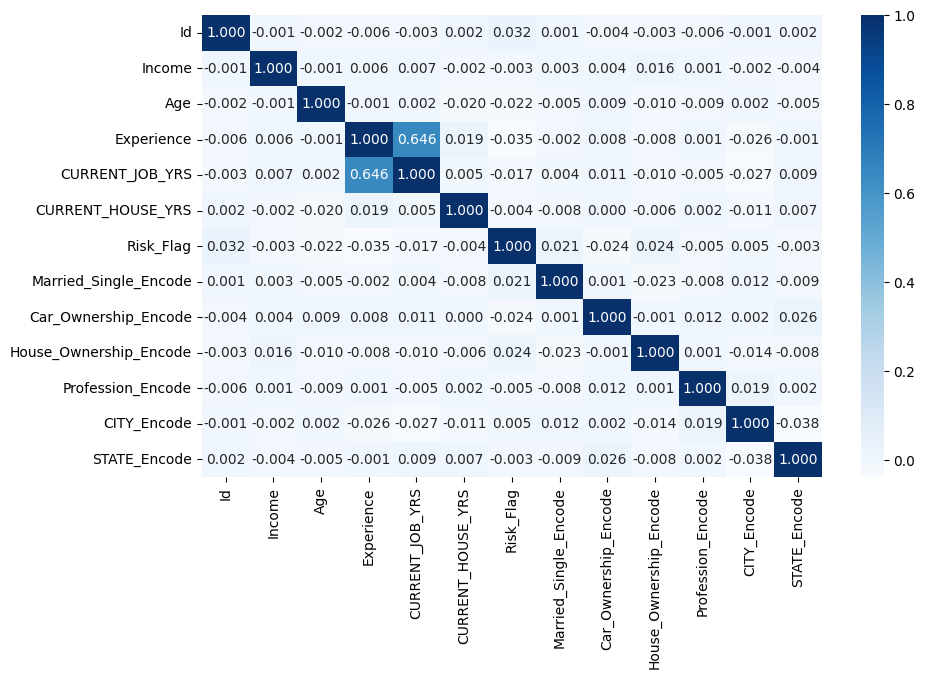

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues', fmt='.3f')
plt.show()

### Categorical Columns

In [70]:
status_grouped = df.groupby(['Married/Single', 'Risk_Flag']).size().unstack()
status_grouped['pcg'] = (status_grouped[1] / status_grouped.sum(axis=1)) * 100
status_grouped.sort_values(by='pcg', ascending=False)

Risk_Flag,0,1,pcg
Married/Single,,,
single,197912,28360,12.533588
married,23092,2636,10.245647


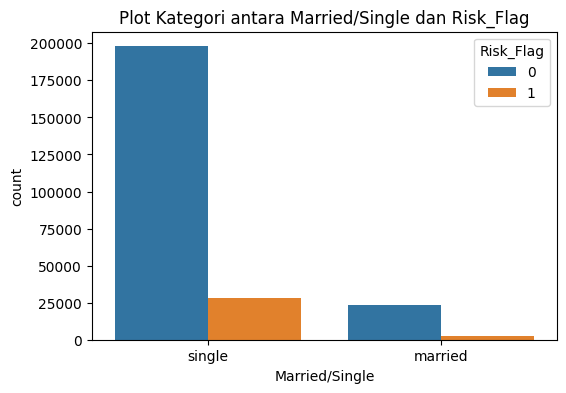

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df)
plt.title('Plot Kategori antara Married/Single dan Risk_Flag', fontsize=12)
plt.xticks(rotation=0)
plt.show()

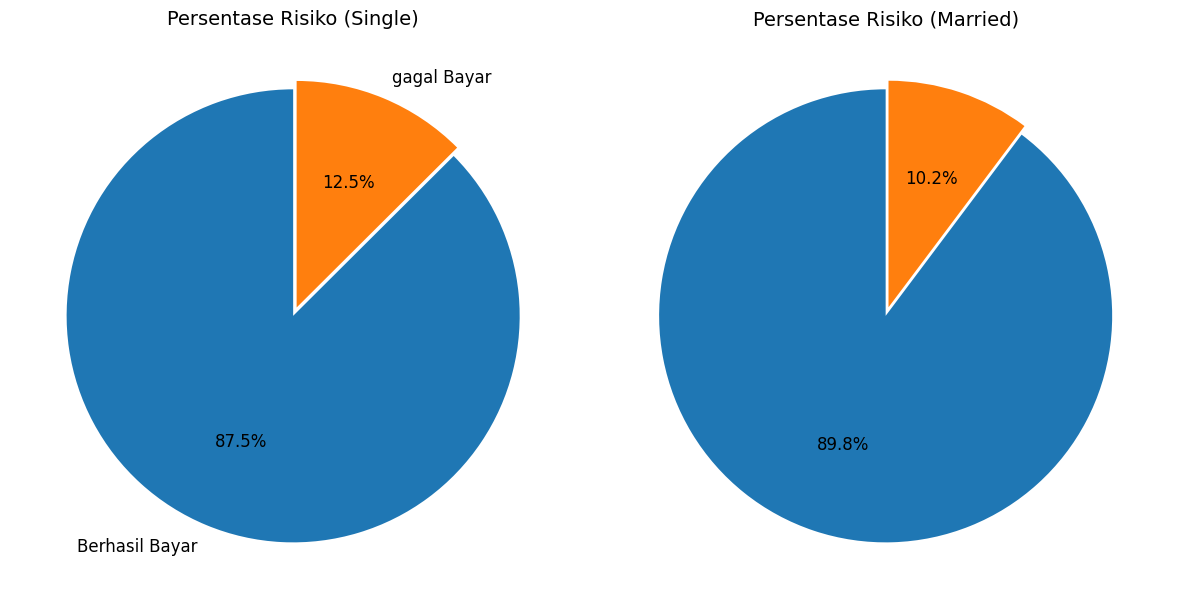

In [117]:
single_data = status_grouped.loc['single']
single_labels = ['Berhasil Bayar', 'gagal Bayar']
single_sizes = [single_data[0], single_data[1]]

married_data = status_grouped.loc['married']
married_labels = ['Berhasil Bayar', 'Gagal Bayar']
married_sizes = [married_data[0], married_data[1]]

pie_explode = (0, 0.04) 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].pie(single_sizes, labels=single_labels, autopct='%1.1f%%', startangle=90, 
            textprops={'fontsize':12, 'color':'black'}, explode=pie_explode)
axes[0].set_title('Persentase Risiko (Single)', fontsize=14)

axes[1].pie(married_sizes, labels=married_labels, autopct='%1.1f%%', startangle=90, 
            textprops={'fontsize':12, 'color':'black'}, labeldistance=None, explode=pie_explode)
axes[1].set_title('Persentase Risiko (Married)', fontsize=14)

plt.tight_layout()
plt.show()

In [71]:
house_grouped = df.groupby(['House_Ownership', 'Risk_Flag']).size().unstack()
house_grouped['pcg'] = (house_grouped[1] / house_grouped.sum(axis=1)) * 100
house_grouped.sort_values(by='pcg', ascending=False)

Risk_Flag,0,1,pcg
House_Ownership,,,
rented,202777,29121,12.557676
norent_noown,6469,715,9.952673
owned,11758,1160,8.979718


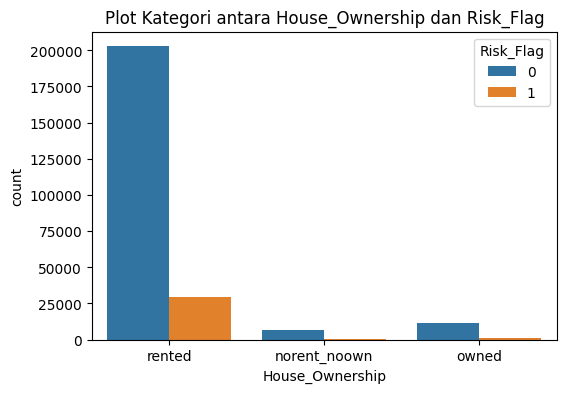

In [42]:
# Plot untuk kolom 'House_Ownership'
plt.figure(figsize=(6, 4))
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df)
plt.title('Plot Kategori antara House_Ownership dan Risk_Flag', fontsize=12)
plt.xticks(rotation=0)
plt.show()

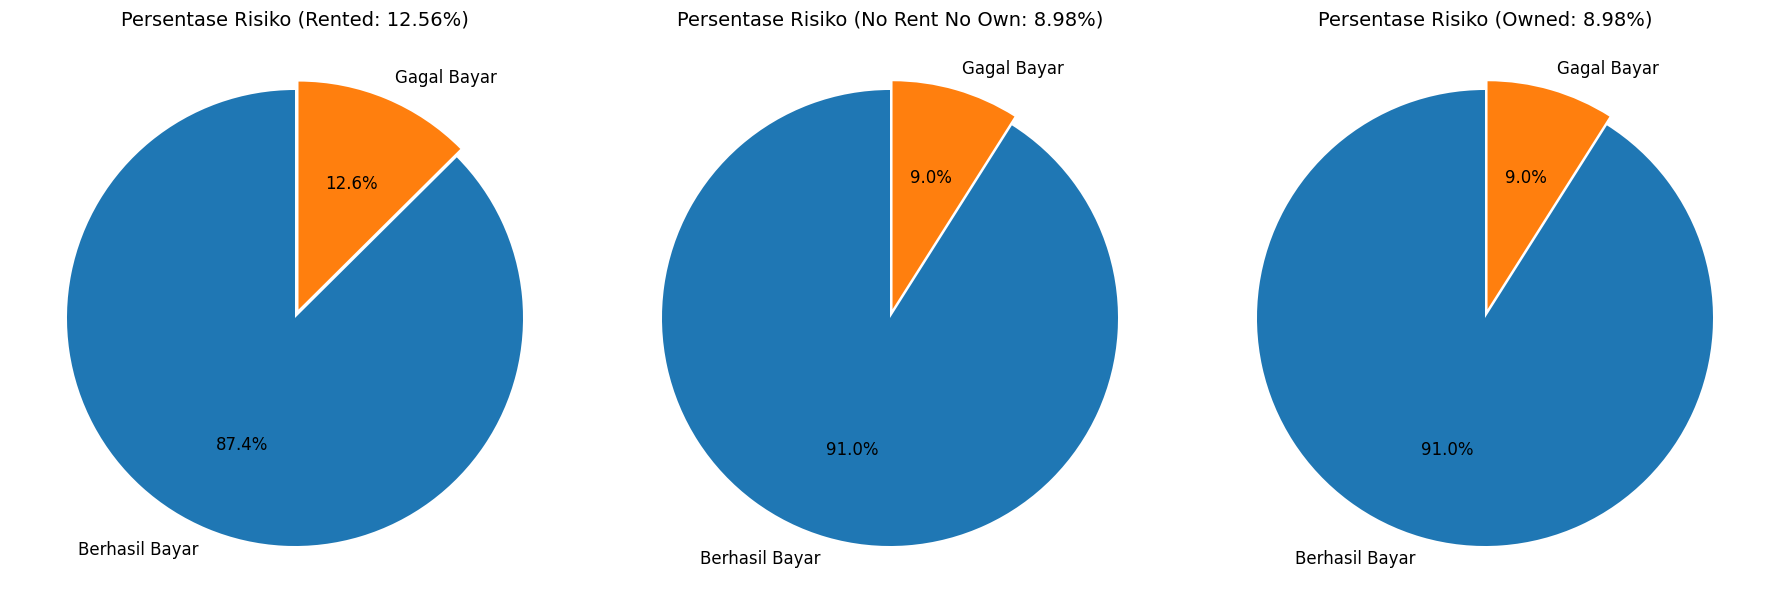

In [118]:
rented_data = house_grouped.loc['rented']
rented_labels = ['Berhasil Bayar', 'Gagal Bayar']
rented_sizes = [rented_data[0], rented_data[1]]
rented_pcg = rented_data['pcg']

owned_data = house_grouped.loc['norent_noown']
owned_labels = ['Berhasil Bayar', 'Gagal Bayar']
owned_sizes = [owned_data[0], owned_data[1]]
owned_pcg = owned_data['pcg']

owned_data = house_grouped.loc['owned']
owned_labels = ['Berhasil Bayar', 'Gagal Bayar']
owned_sizes = [owned_data[0], owned_data[1]]
owned_pcg = owned_data['pcg']

pie_explode = (0, 0.04)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].pie(rented_sizes, labels=rented_labels, autopct='%1.1f%%', startangle=90, 
            textprops={'fontsize':12, 'color':'black'}, explode=pie_explode)
axes[0].set_title(f'Persentase Risiko (Rented: {rented_pcg:.2f}%)', fontsize=14)

axes[1].pie(owned_sizes, labels=owned_labels, autopct='%1.1f%%', startangle=90, 
            textprops={'fontsize':12, 'color':'black'}, explode=pie_explode)
axes[1].set_title(f'Persentase Risiko (No Rent No Own: {owned_pcg:.2f}%)', fontsize=14)

axes[2].pie(owned_sizes, labels=owned_labels, autopct='%1.1f%%', startangle=90, 
            textprops={'fontsize':12, 'color':'black'}, explode=pie_explode)
axes[2].set_title(f'Persentase Risiko (Owned: {owned_pcg:.2f}%)', fontsize=14)

plt.tight_layout()
plt.show()

In [115]:
profession_grouped = df.groupby(['Profession', 'Risk_Flag']).size().unstack()
profession_grouped['pcg'] = (profession_grouped[1] / profession_grouped.sum(axis=1)) * 100
profession_grouped.sort_values(by='pcg', ascending=False).head(5)

Risk_Flag,0,1,pcg
Profession,,,
Police_officer,4209,826,16.405164
Chartered_Accountant,3803,690,15.357222
Army_officer,3952,709,15.211328
Surveyor,4000,714,15.146373
Software_Developer,4303,750,14.842668


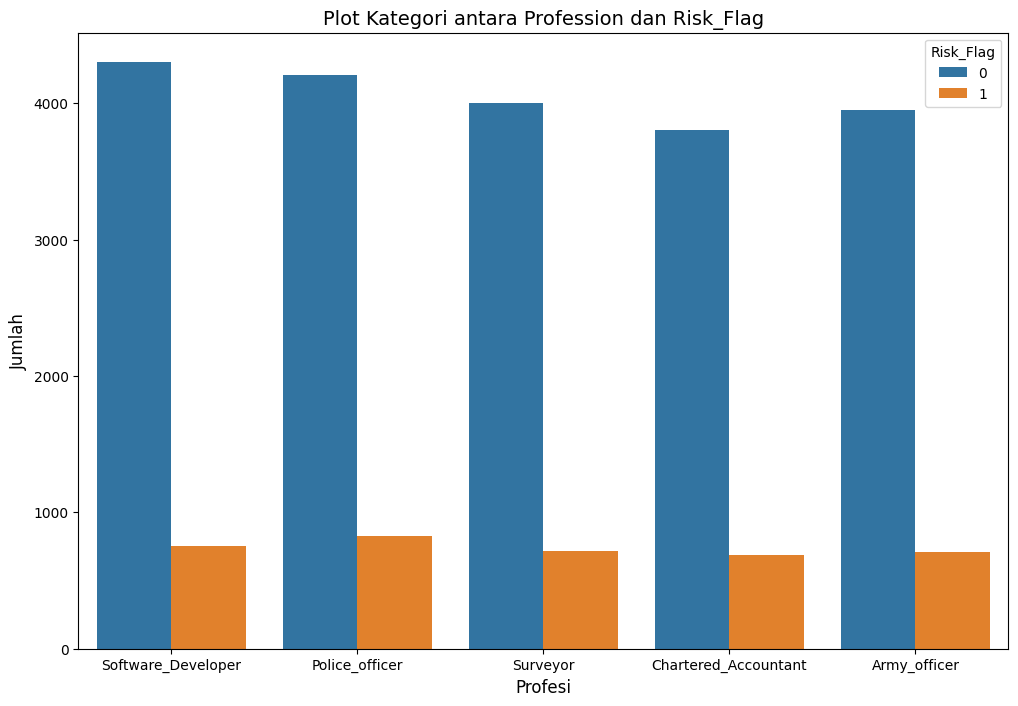

In [135]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Profession', hue='Risk_Flag', data=df[df['Profession'].isin(top_professions.index)])
plt.title('Plot Kategori antara Profession dan Risk_Flag', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Profesi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.legend(title='Risk_Flag', loc='upper right')
plt.show()

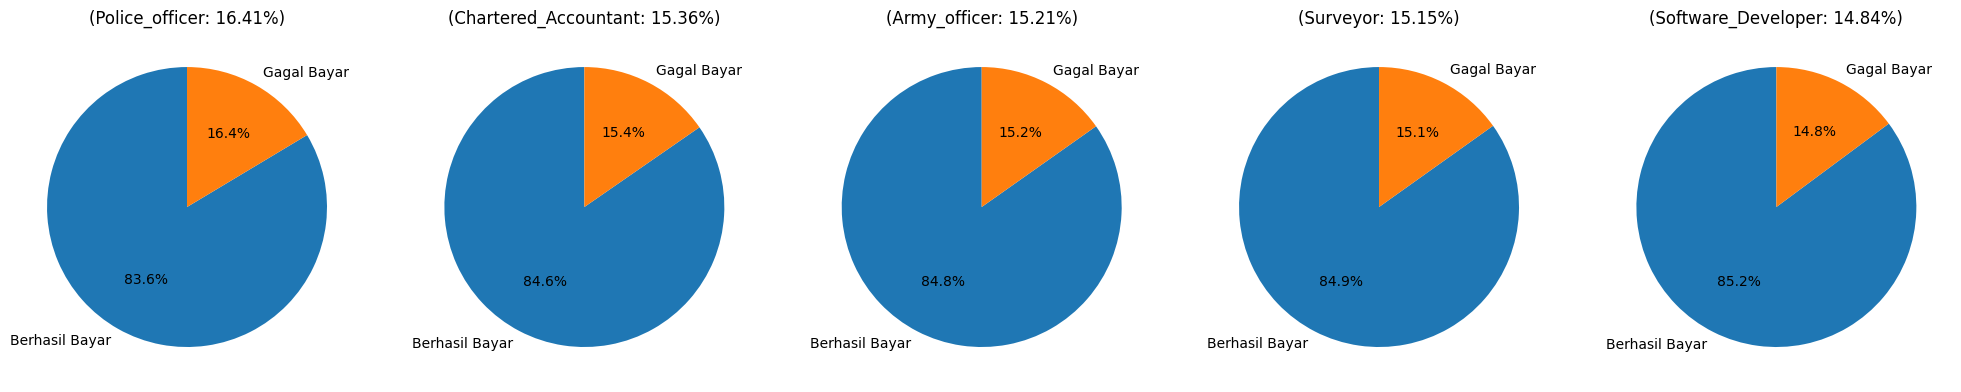

In [133]:
top_professions = profession_grouped.sort_values(by='pcg', ascending=False).head(5)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

for i, profession in enumerate(top_professions.index):
    axes[i].pie(top_professions.loc[profession, [0, 1]], labels=['Berhasil Bayar', 'Gagal Bayar'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'({profession}: {top_professions["pcg"][profession]:.2f}%)', fontsize=12)

plt.tight_layout()
plt.show()

In [131]:
city_grouped = df.groupby(['CITY', 'Risk_Flag']).size().unstack()
city_grouped['pcg'] = (city_grouped[1] / city_grouped.sum(axis=1)) * 100
city_grouped.sort_values(by='pcg', ascending=False).head()

Risk_Flag,0,1,pcg
CITY,,,
Bhubaneswar,409,198,32.619440
Gwalior,448,168,27.272727
Bettiah[33],335,122,26.695842
Kochi,718,243,25.286160
Raiganj,546,172,23.955432


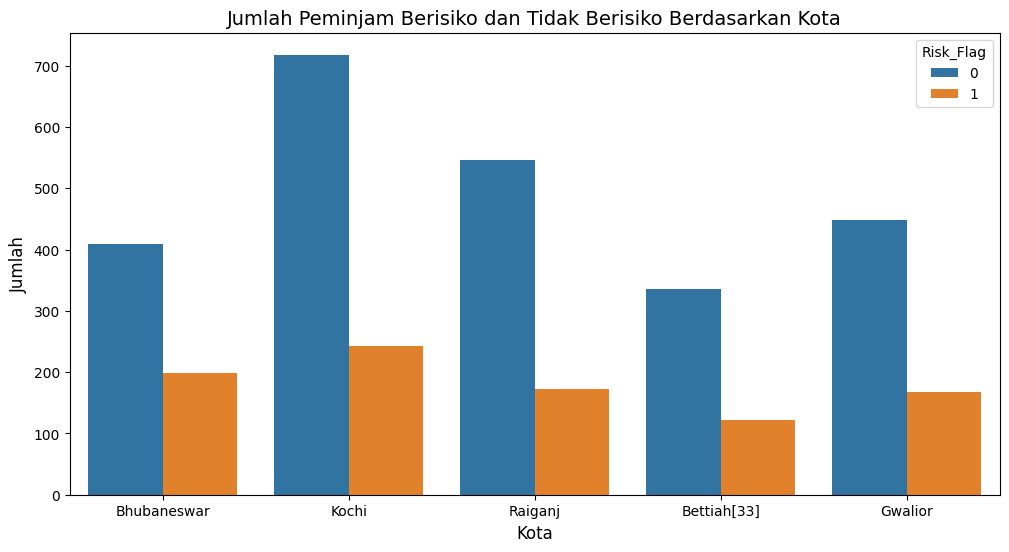

In [138]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['CITY'].isin(top_cities.index)], x='CITY', hue='Risk_Flag')
plt.title('Jumlah Peminjam Berisiko dan Tidak Berisiko Berdasarkan Kota', fontsize=14)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Risk_Flag', loc='upper right')
plt.show()

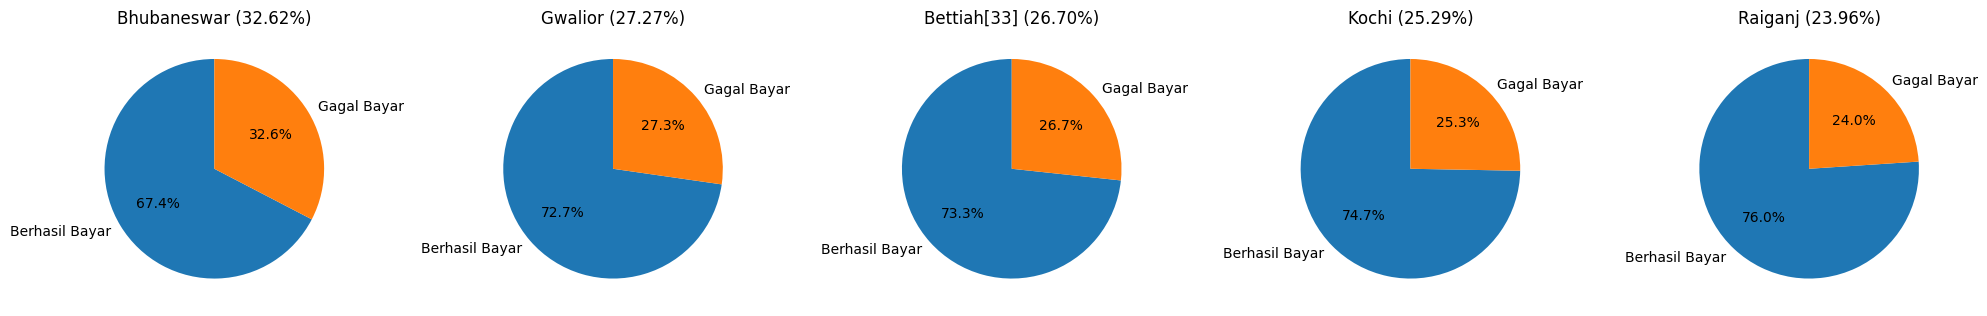

In [139]:
# Membuat subplot untuk pie chart
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Membuat pie chart untuk setiap kota teratas
for i, city in enumerate(top_cities.index):
    sizes = top_cities.loc[city, [0, 1]]
    axes[i].pie(sizes, labels=['Berhasil Bayar', 'Gagal Bayar'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{city} ({top_cities["pcg"][city]:.2f}%)', fontsize=12)

# Menampilkan plot pie chart
plt.tight_layout()
plt.show()

In [140]:
state_grouped = df.groupby(['STATE', 'Risk_Flag']).size().unstack().sort_values(by=1, ascending=False)
state_grouped['pcg'] = (state_grouped[1] / state_grouped.sum(axis=1)) * 100
state_grouped.sort_values(by='pcg', ascending=False).head()

Risk_Flag,0,1,pcg
STATE,,,
Manipur,666,183,21.554770
Tripura,673,136,16.810878
Kerala,4835,970,16.709733
Jammu_and_Kashmir,1497,283,15.898876
Madhya_Pradesh,11942,2180,15.436907


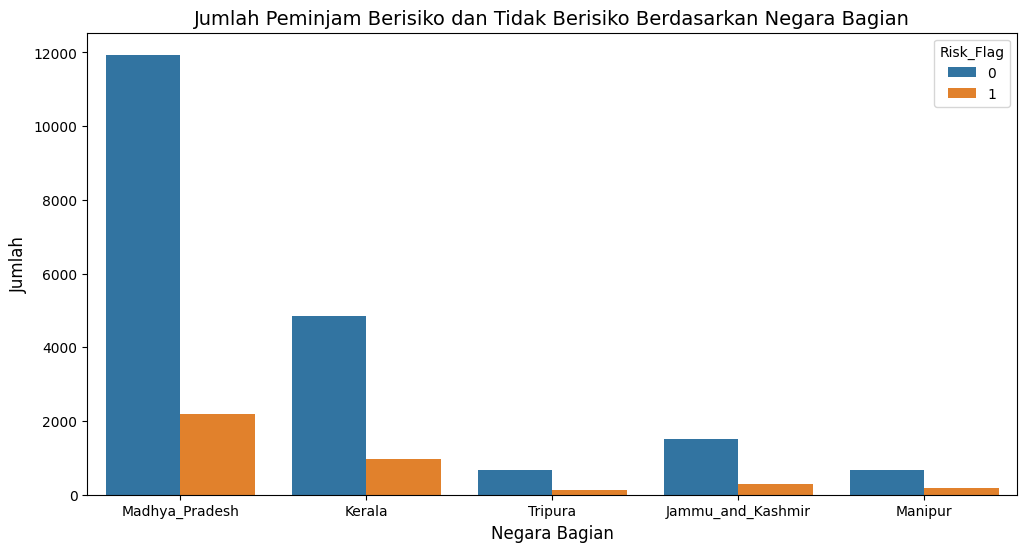

In [143]:
top_states = state_grouped.sort_values(by='pcg', ascending=False).head()

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['STATE'].isin(top_states.index)], x='STATE', hue='Risk_Flag')
plt.title('Jumlah Peminjam Berisiko dan Tidak Berisiko Berdasarkan Negara Bagian', fontsize=14)
plt.xlabel('Negara Bagian', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Risk_Flag', loc='upper right')
plt.show()

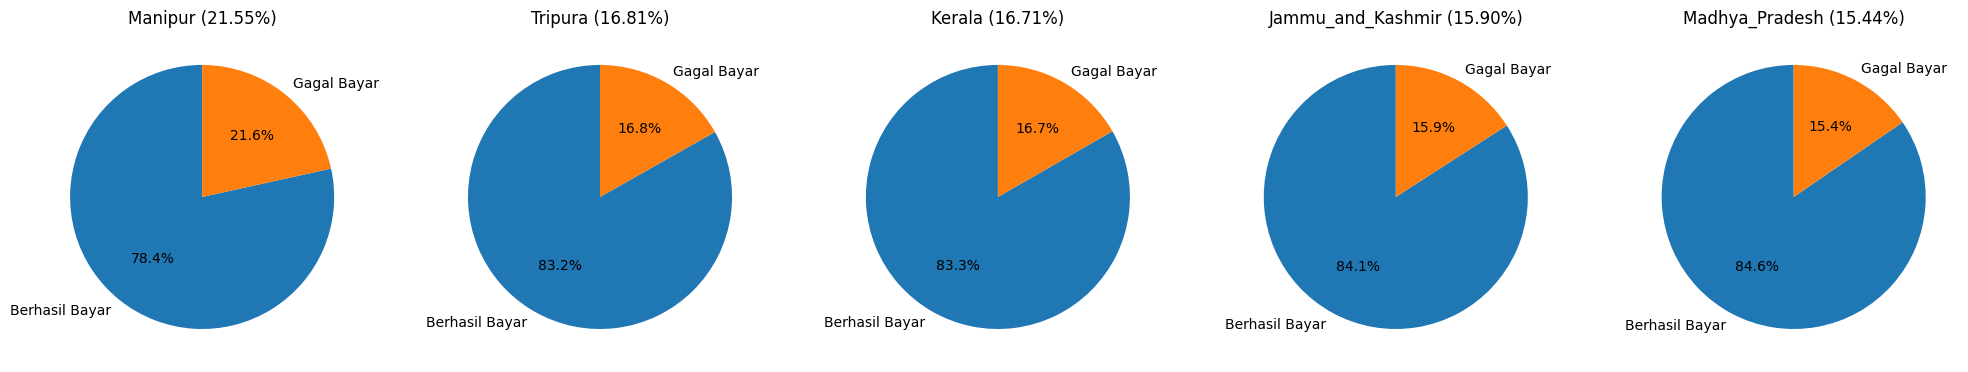

In [145]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, state in enumerate(top_states.index):
    sizes = top_states.loc[state, [0, 1]]
    axes[i].pie(sizes, labels=['Berhasil Bayar', 'Gagal Bayar'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{state} ({top_states["pcg"][state]:.2f}%)', fontsize=12)

plt.tight_layout()
plt.show()